# OCCUPANCY DETECTION

This dataset was retrieved from UCI Machine Learning Repository. It is a binary classification (occupied, unoccupied) to determine whether a room is occupied or not based on five features-temperature, humidity, light, CO2, and humidity ratio.

This notebook aims to demonstrate my ability to use logistic regression and support vector machine, as well as cross-validation and validation curves on SVM's parameters. So far, processing time for cross-validation on 4-core CPU takes a long time, therefore I restrict my scoring method to precision.

Recall that precision measures the ratio between true positives against all positives (both true and false), while recall measures the ratio between true positives against true positives and false negatives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
#Training
df = pd.read_csv("datatraining.txt")
df.dropna(how = 'all', inplace = True)

X_train = np.array(df.drop(["date","Occupancy"],1))
y_train = np.array(df["Occupancy"]).ravel()

In [3]:
#Testing
df_test = pd.read_csv("datatest.txt") #a separate file for training
df_test.dropna(how = 'all', inplace = True)

X_test = np.array(df_test.drop(["date","Occupancy"],1))
y_test = np.array(df_test["Occupancy"]).ravel()

In [4]:
#Cross-Validation
df_cv = pd.read_csv("datatest2.txt") #a separate file for training
df_cv.dropna(how = 'all', inplace = True)

X_cv = np.array(df_cv.drop(["date","Occupancy"],1))
y_cv = np.array(df_cv["Occupancy"]).ravel()

In [5]:
print(df.head())

                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
#X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_cv_scaled = scaler.transform(X_cv)

In [14]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', dual=False, fit_intercept=True, solver='newton-cg')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

print(clf.score(X_test, y_test))
print("{0} / {1} correct".format(np.sum(y_test == y_predict), len(y_test)))

0.976360225141
2602 / 2665 correct


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.97636022514071297

In [17]:
clf2 = LogisticRegression(penalty='l2', dual=False, fit_intercept=True, solver='liblinear')
clf2.fit(X_train,y_train)
y_predict = clf2.predict(X_test)

print(clf2.score(X_test, y_test))
print("{0} / {1} correct".format(np.sum(y_test == y_predict), len(y_test)))

0.978236397749
2607 / 2665 correct


In [21]:
from sklearn import cross_validation

scores = cross_validation.cross_val_score(clf2, X_cv, y_cv, cv=10)
print(scores)
print("Mean: ", scores.mean())
print("std: ", scores.std())

[ 0.99692623  0.98360656  0.9795082   0.99794872  0.99487179  0.98153846
  1.          0.98871795  0.99282051  1.        ]
Mean:  0.99159384195
std:  0.00735959551661


In [23]:
from sklearn import metrics

print("accuracy:", metrics.accuracy_score(y_test, y_predict))
print("precision:", metrics.precision_score(y_test, y_predict))
print("recall:", metrics.recall_score(y_test, y_predict))
print("f1 score:", metrics.f1_score(y_test, y_predict))

accuracy: 0.978236397749
precision: 0.9462890625
recall: 0.996913580247
f1 score: 0.970941883768


In [24]:
print(metrics.classification_report(y_test, y_predict, target_names=['background', 'foreground']))

             precision    recall  f1-score   support

 background       1.00      0.97      0.98      1693
 foreground       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665



In [27]:
#Quick comparison with other solver besides liblinear and newton-cg

clf3 = LogisticRegression(fit_intercept=True, solver='sag')
clf3.fit(X_train,y_train)
y_predict = clf3.predict(X_test)

print(clf3.score(X_test, y_test))
print("{0} / {1} correct".format(np.sum(y_test == y_predict), len(y_test)))

0.978236397749
2607 / 2665 correct


C:\Users\taufik.azri\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [7]:
#SUPPORT VECTOR CLASSIFICATION
#SVC, NuSVC, and LinearSVC

from sklearn import svm
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

svmachine = svm.SVC(C=1.0, kernel='rbf', gamma='auto', random_state=32)
svmachine.fit(X_train, y_train)
y_predict= svmachine.predict(X_test)

print(svmachine.score(X_test, y_test))
print("{0} / {1} correct".format(np.sum(y_test == y_predict), len(y_test)))

0.910318949343
2426 / 2665 correct


In [8]:
scores = cross_validation.cross_val_score(svmachine, X_cv, y_cv, cv=10)
print(scores)
print("Mean: ", scores.mean())

[ 0.81967213  0.80942623  0.81352459  0.80717949  0.80923077  0.86871795
  0.9025641   0.82871795  0.81025641  0.79979466]
Mean:  0.826908427868


In [10]:
#reference: page 840

#Parameter estimation using grid search using cross-validation

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from time import time

tuned_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    start = time()
    grid_search = GridSearchCV(svm.SVC(), tuned_params, cv=5, scoring='%s_weighted' % score)
    grid_search.fit(X_cv, y_cv)
    print("Best parameters set found on development set:")
    print()
    print(grid_search.best_params_)
    print()
    print("Best scores of the best parameters found:")
    print(grid_search.best_score_)
    print()
    print("Grid scores on development set:")
    print()
    
    for params, mean_score, scores in grid_search.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
   
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_predict = grid_search.predict(X_test)
    print(classification_report(y_test, y_predict))
    print()
    print("GridSearchCV took %.2f seconds for %d candidate parameter settings." 
          % (time() - start, len(grid_search.grid_scores_)))
    #report(grid_search.grid_scores_)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Best scores of the best parameters found:
0.993052865399

Grid scores on development set:

0.914 (+/-0.107) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.987 (+/-0.022) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.939 (+/-0.078) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.979 (+/-0.033) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.925 (+/-0.076) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.946 (+/-0.101) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.923 (+/-0.078) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.925 (+/-0.129) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}
0.990 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.993 (+/-0.005) for {'C': 10, 'kernel': 'linear'}
0.988 (+/-0.015) for {'C': 100, 'kernel': 'linear'}
0.988 (+/-0.013) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the fu

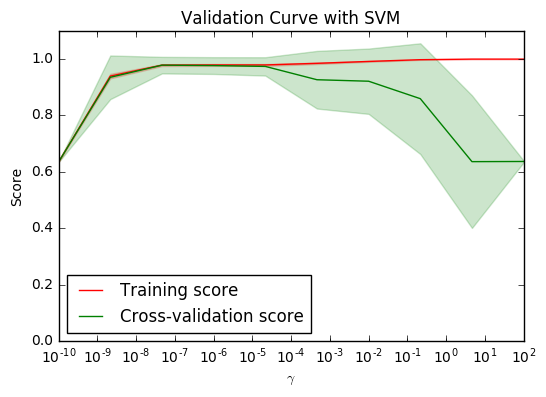

In [8]:
#PLOT VALIDATION CURVES

from sklearn.learning_curve import validation_curve
from sklearn import svm

%matplotlib inline

param_range = np.logspace(-10, 2, 10)
clf = svm.SVC(kernel='rbf')
train_scores, test_scores = validation_curve(clf, X_test, y_test, 
                                             param_name="gamma", 
                                             param_range=param_range, 
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")


In [ ]:
#try this one for randomized search cv

#reference: page 840

#Parameter estimation using grid search using cross-validation

from sklearn.grid_search import RandomizedSearchCV

param_dist = [{'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1), 
               'kernel': ['rbf'], 'class_weight':['auto', None]}]


scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    start = time()
    clf = svm.SVC()
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10)
    random_search.fit(X_cv, y_cv)
    print("Best parameters set found on development set:")
    print()
    print(random_search.best_params_)
    print()
    print("Best scores of the best parameters found:")
    print(random_search.best_scores_)
    print()
    print("Grid scores on development set:")
    print()
    
    for params, mean_score, scores in random_search.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
   
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_predict = random_search.predict(X_test)
    print(classification_report(y_test, y_predict))
    print()
    print("GridSearchCV took %.2f seconds for %d candidate parameter settings." 
          % (time() - start, len(random_search.grid_scores_)))
    #report(grid_search.grid_scores_)
    
#RUNNING TIME EXCESSIVELY LONG.